In [ ]:
# !wget -P tf-homer http://homer.ucsd.edu/homer/data/motifs/homer.KnownMotifs.hg38.191020.bed.gz
# !cd tf-homer && gunzip homer.KnownMotifs.hg38.191020.bed.gz
# !wget -P tf-homer http://homer.ucsd.edu/homer/custom.motifs

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

In [ ]:
working_dir = '/home/jovyan/kaggle/working/'
tf_fn = working_dir + '/tf-homer/homer.KnownMotifs.hg38.191020.bed'
motifs_fn = working_dir + '/tf-homer/custom.motifs'
gense_fn = working_dir + '/genome/Homo_sapiens.gene_info'
genome_ann_fn = working_dir + '/genome/gencode.v44.annotation.gtf'

data_dir = '/home/jovyan/kaggle/input/open-problems-single-cell-perturbations'
multiome_train_fn = data_dir + '/multiome_train.parquet'
multiome_var_fn = data_dir + '/multiome_var_meta.csv'
multiome_obs_fn = data_dir + '/multiome_obs_meta.csv'

In [3]:
multiome_train_df = pd.read_parquet(multiome_train_fn)

In [4]:
print(multiome_train_df.shape)
multiome_train_df.head(5)

(216251368, 4)


,obs_id,location,count,normalized_count
0,000225c1151ab841,AAMP,1,6.320659
1,000225c1151ab841,AASS,1,6.320659
2,000225c1151ab841,ABCC11,1,6.320659
3,000225c1151ab841,ABCC2,1,6.320659
4,000225c1151ab841,ABR,1,6.320659


In [5]:
multiome_var_df = pd.read_csv(multiome_var_fn)
print(multiome_var_df.shape)
multiome_var_df.head(5)

(158205, 5)


,location,gene_id,feature_type,genome,interval
0,A1BG,ENSG00000121410,Gene Expression,GRCh38,chr19:58353491-58353492
1,A1BG-AS1,ENSG00000268895,Gene Expression,GRCh38,chr19:58347750-58351970
2,A2M,ENSG00000175899,Gene Expression,GRCh38,chr12:9116156-9116157
3,A2M-AS1,ENSG00000245105,Gene Expression,GRCh38,chr12:9065162-9065177
4,A2ML1,ENSG00000166535,Gene Expression,GRCh38,chr12:8822620-8845004


In [6]:
multiome_merged_df = multiome_train_df.merge(multiome_var_df[['location', 'feature_type']], on='location')

In [7]:
multiome_atac_df = multiome_merged_df[multiome_merged_df['feature_type'] == 'Peaks']

In [62]:
print(multiome_atac_df.shape)
multiome_atac_df.head(5)

(173485202, 5)


,obs_id,location,count,normalized_count,feature_type
7852194,000225c1151ab841,chr10:100346599-100347467,2,2.664076,Peaks
7852195,0029fb478bc85e1e,chr10:100346599-100347467,2,0.635837,Peaks
7852196,002af4469acf42bd,chr10:100346599-100347467,2,0.907113,Peaks
7852197,0033aa62048b8766,chr10:100346599-100347467,2,0.615655,Peaks
7852198,003f13341431b074,chr10:100346599-100347467,2,1.416480,Peaks


<Axes: >

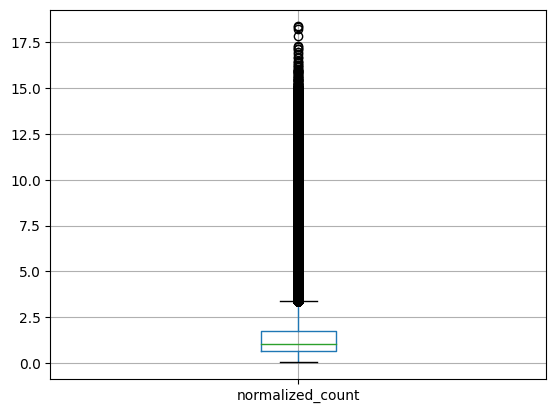

In [65]:
multiome_atac_df.boxplot('normalized_count')

array([[<Axes: title={'center': 'normalized_count'}>]], dtype=object)

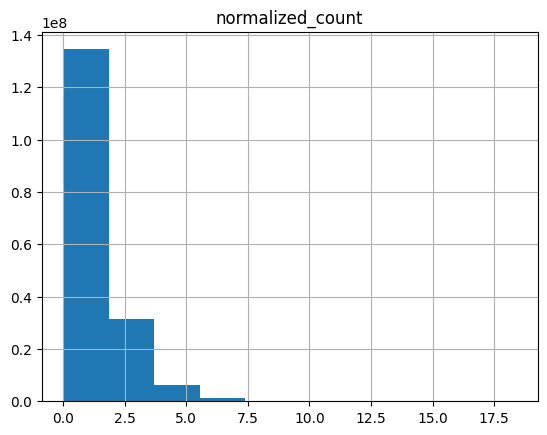

In [66]:
multiome_atac_df.hist('normalized_count')

In [126]:
a_quantile = multiome_atac_df['normalized_count'].quantile(.9999)
multiome_atac_df_quantiled = multiome_atac_df[multiome_atac_df['normalized_count']>a_quantile]
multiome_atac_df_quantiled[['chr', 'positions']] = multiome_atac_df_quantiled['location'].str.split(':', expand=True)
multiome_atac_df_quantiled[['start', 'end']] = multiome_atac_df_quantiled['positions'].str.split('-', expand=True)
multiome_atac_df_quantiled.drop('positions', axis=1, inplace=True)
multiome_atac_df_quantiled['start'] = multiome_atac_df_quantiled['start'].astype(int)
multiome_atac_df_quantiled['end'] = multiome_atac_df_quantiled['end'].astype(int)

/tmp/ipykernel_303/2787259032.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  multiome_atac_df_quantiled[['chr', 'positions']] = multiome_atac_df_quantiled['location'].str.split(':', expand=True)
/tmp/ipykernel_303/2787259032.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  multiome_atac_df_quantiled[['chr', 'positions']] = multiome_atac_df_quantiled['location'].str.split(':', expand=True)
/tmp/ipykernel_303/2787259032.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

In [127]:
print(multiome_atac_df_quantiled.shape)
multiome_atac_df_quantiled.head(5)

(17349, 8)


,obs_id,location,count,normalized_count,feature_type,chr,start,end
8183986,45d176ea71182095,chr10:50410203-50411005,2,11.271763,Peaks,chr10,50410203,50411005
8196070,dbe5233c0fca94a2,chr10:52314043-52314990,2,11.599880,Peaks,chr10,52314043,52314990
9978761,f208a59a193da5d3,chr13:46995815-46996652,3,13.049441,Peaks,chr13,46995815,46996652
10541324,8d92dcc1d565f1e3,chr15:59349823-59350725,2,11.687633,Peaks,chr15,59349823,59350725
10750584,7ff42c304eb5e016,chr15:83365261-83366118,2,12.173644,Peaks,chr15,83365261,83366118


In [128]:
print(multiome_atac_df_quantiled['chr'].unique())
multiome_atac_df_quantiled = multiome_atac_df_quantiled[multiome_atac_df_quantiled['chr'].str.startswith('chr')]

['chr10' 'chr13' 'chr15' 'chr16' 'chr1' 'chr20' 'chr3' 'chr4' 'chr6'
 'chr8' 'chr9' 'chr12' 'chr2' 'chrY' 'chr14' 'chr17' 'chr18' 'chr19'
 'chr21' 'chr5' 'chr7' 'chrX' 'chr11' 'chr22' 'KI270713.1' 'GL000194.1'
 'GL000195.1' 'GL000205.2' 'GL000219.1' 'GL000218.1' 'KI270731.1']


<Axes: >

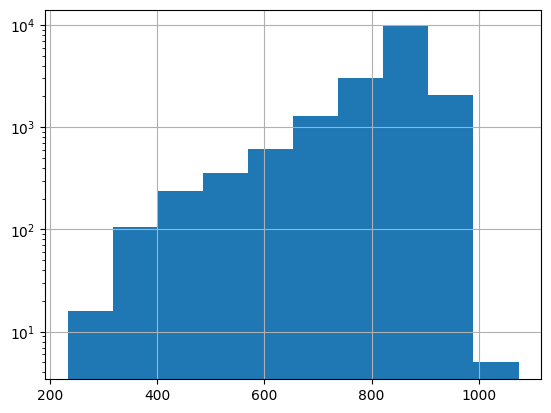

In [129]:
(multiome_atac_df_quantiled['end']-multiome_atac_df_quantiled['start']).hist(log=True)

# Transcription factors

In [8]:
tf_df = pd.read_csv(tf_fn, sep='\t', names=['chr', 'start', 'end', 'name', 'anum', 'abool'], usecols=[0,1,2,3])

In [9]:
print(tf_df.shape)
tf_df.head(5)

(667497643, 4)


,chr,start,end,name
0,chr1,10144,10151,Pitx1(Homeobox)
1,chr1,10144,10155,COUP-TFII(NR)
2,chr1,10228,10235,Pitx1(Homeobox)
3,chr1,10228,10239,COUP-TFII(NR)
4,chr1,10232,10251,PSE(SNAPc)


In [91]:
tf_diff_df = tf_df['end']-tf_df['start']
tf_diff_df.head(5)

0     7
1    11
2     7
3    11
4    19
dtype: int64

<Axes: >

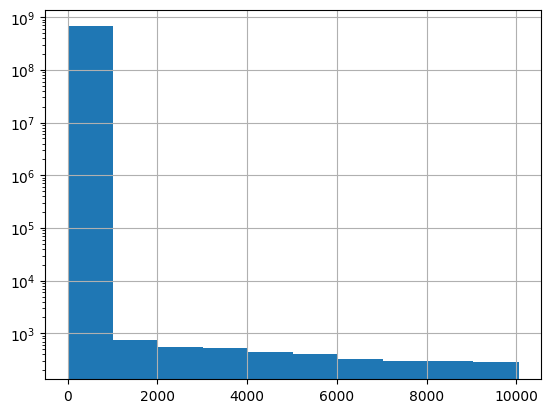

In [93]:
tf_diff_df.hist(log=True)

<Axes: >

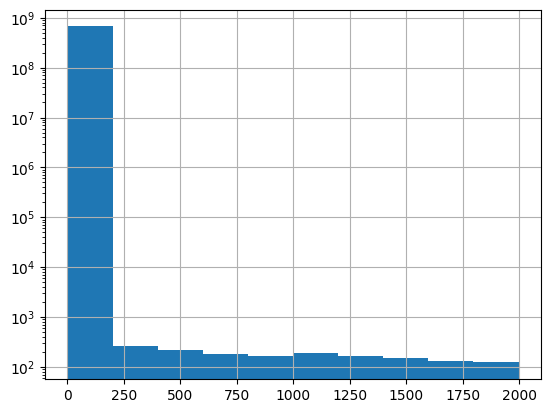

In [94]:
tf_diff_df[tf_diff_df<2000].hist(log=True)

In [20]:
unique_chrs = [x for x in tf_df['chr'].unique() if '_' not in x]

In [24]:
for chr in unique_chrs:
    print(chr)
    fn = working_dir + f'/tfs-chrs/{chr}.csv'
    if not os.path.exists(fn):
        tf_df[tf_df['chr']==chr].to_csv(fn)

chr1
chr10
chr11
chr12
chr13
chr14
chr15
chr16
chr17
chr18
chr19
chr2
chr20
chr21
chr22
chr3
chr4
chr5
chr6
chr7
chr8
chr9
chrM
chrX
chrY


In [95]:
last_chr_tf, last_chr_tf_df = None, None

In [100]:
# 0	chr1	10144	10151	Pitx1(Homeobox)
def contains_tf(chr, pos_start, pos_end):
    global last_chr_tf, last_chr_tf_df
    assert isinstance(ch, str) # chr1, ...
    if chr != last_chr_tf:
        last_chr_tf = chr
        print(f'loding last_chr_df {chr} ...')
        last_chr_tf_df = pd.read_csv(working_dir + f'/tfs-chrs/{chr}.csv')
        print('done')
        
    t_df = last_chr_tf_df[(last_chr_tf_df['start']>=pos_start) & (last_chr_tf_df['end']<=pos_end)]
    ret = []
    for name in t_df['name'].to_list():
        ret.append(name.split('(')[0])
    return ret

In [147]:
# 0	chr1	10144	10151	Pitx1(Homeobox)
# 	chr1	10144	10155	COUP-TFII(NR)
contains_tf('chr1', 10143, 10160)

['Pitx1', 'COUP-TFII']

In [130]:
multiome_atac_df_quantiled.sort_values(by='chr', inplace=True)

In [131]:
multiome_atac_df_quantiled.head()

,obs_id,location,count,normalized_count,feature_type,chr,start,end
204109135,c7b943c78b4bf575,chr1:205199268-205200201,2,11.333420,Peaks,chr1,205199268,205200201
171344489,9c4414aa8eff2754,chr1:61588454-61589330,2,10.756858,Peaks,chr1,61588454,61589330
171344396,20f0d1325e46f8d0,chr1:61588454-61589330,2,10.660714,Peaks,chr1,61588454,61589330
171341410,fb7b4a51b922bd5e,chr1:5640572-5641457,2,11.253135,Peaks,chr1,5640572,5641457
171331241,4fa5cd5336a6ca6a,chr1:53416757-53417579,3,11.038558,Peaks,chr1,53416757,53417579


In [132]:
from tqdm import tqdm
tqdm.pandas()
multiome_atac_quantiled_fn = working_dir + 'multiome_atac_df_quantiled.csv'
if not os.path.exists(multiome_atac_quantiled_fn):
    multiome_atac_df_quantiled['tfs'] = multiome_atac_df_quantiled.progress_apply(
        lambda row: contains_tf(row['chr'], row['start'], row['end']), axis=1)
    multiome_atac_df_quantiled.write_csv(multiome_atac_quantiled_fn)
    
multiome_atac_df_quantiled = pd.read_csv(multiome_atac_quantiled_fn)

  9%|▉         | 1613/17332 [02:24<23:27, 11.17it/s]

loding last_chr_df chr10 ...


  9%|▉         | 1615/17332 [02:43<12:34:09,  2.88s/it]

done


 14%|█▍        | 2509/17332 [03:33<13:35, 18.18it/s]   

loding last_chr_df chr11 ...


 14%|█▍        | 2510/17332 [03:51<13:41:01,  3.32s/it]

done


 18%|█▊        | 3176/17332 [04:29<13:12, 17.87it/s]   

loding last_chr_df chr12 ...


 18%|█▊        | 3177/17332 [04:48<13:45:39,  3.50s/it]

done


 23%|██▎       | 3977/17332 [05:32<12:04, 18.43it/s]   

loding last_chr_df chr13 ...


 23%|██▎       | 3979/17332 [05:46<8:12:58,  2.22s/it]

done


 26%|██▌       | 4456/17332 [06:06<09:05, 23.62it/s]  

loding last_chr_df chr14 ...


 26%|██▌       | 4462/17332 [06:20<3:32:15,  1.01it/s]

done


 29%|██▉       | 5029/17332 [06:42<08:00, 25.60it/s]  

loding last_chr_df chr15 ...


 29%|██▉       | 5032/17332 [06:55<4:19:36,  1.27s/it]

done


 33%|███▎      | 5656/17332 [07:18<07:18, 26.65it/s]  

loding last_chr_df chr16 ...


 33%|███▎      | 5662/17332 [07:30<2:43:17,  1.19it/s]

done


 35%|███▍      | 6037/17332 [07:43<06:55, 27.16it/s]  

loding last_chr_df chr17 ...


 35%|███▍      | 6043/17332 [07:55<2:35:08,  1.21it/s]

done


 39%|███▊      | 6679/17332 [08:17<06:12, 28.57it/s]  

loding last_chr_df chr18 ...


 39%|███▊      | 6684/17332 [08:29<2:37:56,  1.12it/s]

done


 41%|████▏     | 7152/17332 [08:45<06:03, 27.99it/s]  

loding last_chr_df chr19 ...


 41%|████▏     | 7162/17332 [08:53<1:11:05,  2.38it/s]

done


 43%|████▎     | 7463/17332 [08:58<02:31, 65.20it/s]  

loding last_chr_df chr2 ...


 43%|████▎     | 7466/17332 [09:34<5:04:00,  1.85s/it]

done


 52%|█████▏    | 9031/17332 [11:09<08:23, 16.48it/s]  

loding last_chr_df chr20 ...


 52%|█████▏    | 9037/17332 [11:17<1:34:30,  1.46it/s]

done


 55%|█████▍    | 9465/17332 [11:29<03:51, 33.94it/s]  

loding last_chr_df chr21 ...


 55%|█████▍    | 9478/17332 [11:35<29:26,  4.44it/s]

done


 56%|█████▌    | 9718/17332 [11:38<01:23, 91.30it/s]

loding last_chr_df chr22 ...


 56%|█████▌    | 9728/17332 [11:43<21:26,  5.91it/s]

done


 58%|█████▊    | 9968/17332 [11:45<01:18, 93.83it/s]

loding last_chr_df chr3 ...


 58%|█████▊    | 9970/17332 [12:14<2:20:13,  1.14s/it]

done


 64%|██████▍   | 11124/17332 [13:44<08:02, 12.86it/s] 

loding last_chr_df chr4 ...


 64%|██████▍   | 11126/17332 [14:12<7:23:27,  4.29s/it]

done


 69%|██████▉   | 12040/17332 [15:22<06:42, 13.15it/s]  

loding last_chr_df chr5 ...


 69%|██████▉   | 12042/17332 [15:47<5:32:40,  3.77s/it]

done


 76%|███████▌  | 13086/17332 [17:02<05:05, 13.90it/s]  

loding last_chr_df chr6 ...


 76%|███████▌  | 13088/17332 [17:26<4:10:04,  3.54s/it]

done


 82%|████████▏ | 14249/17332 [18:17<02:14, 22.94it/s]  

loding last_chr_df chr7 ...


 82%|████████▏ | 14250/17332 [18:38<2:20:46,  2.74s/it]

done


 87%|████████▋ | 15157/17332 [19:36<02:20, 15.52it/s]  

loding last_chr_df chr8 ...


 87%|████████▋ | 15159/17332 [19:56<1:49:58,  3.04s/it]

done


 92%|█████████▏| 16007/17332 [20:48<01:20, 16.54it/s]  

loding last_chr_df chr9 ...


 92%|█████████▏| 16009/17332 [21:04<55:21,  2.51s/it]

done


 96%|█████████▋| 16689/17332 [21:39<00:33, 19.40it/s]

loding last_chr_df chrX ...


 96%|█████████▋| 16690/17332 [22:01<41:39,  3.89s/it]

done


100%|█████████▉| 17280/17332 [22:39<00:03, 15.63it/s]

loding last_chr_df chrY ...


100%|█████████▉| 17296/17332 [22:43<00:05,  6.65it/s]

done


100%|██████████| 17332/17332 [22:43<00:00, 12.71it/s]


In [ ]:
multiome_atac_df_quantiled.head(5)

# Motif information (a short exploration, we didn't take this approach)

In [6]:
rows = []
with open(motifs_fn) as f:
    for line in f:
        if line.startswith('>'):
            parts = line.split('\t')
            parts2 = parts[1].split('/')
            parts3 = parts2[0].split('(')
            rows.append([parts[0][1:], parts3[0]])
motifs_df = pd.DataFrame(rows, columns=['motif', 'tf'])

In [7]:
print(motifs_df.shape)
motifs_df.head(5)

(436, 2)


,motif,tf
0,ATGACTCATC,AP-1
1,SCCTSAGGSCAW,AP-2gamma
2,ATGCCCTGAGGC,AP-2alpha
3,NAHCAGCTGD,Ap4
4,AGTAAACAAAAAAGAACANA,FOXA1:AR


# Gonome information

In [138]:
ga_df = pd.read_csv(genome_ann_fn, sep='\t', comment='#', header=None)
ga_df = ga_df[ga_df[2] == 'gene']

In [140]:
print(ga_df.shape)
ga_df.head(5)

(62700, 9)


,0,1,2,3,4,5,6,7,8
0,chr1,HAVANA,gene,11869,14409,.,+,.,"gene_id ""ENSG00000290825.1""; gene_type ""lncRNA""; gene_name ""DDX11L2""; level 2; tag ""overlaps_pseudogene"";"
5,chr1,HAVANA,gene,12010,13670,.,+,.,"gene_id ""ENSG00000223972.6""; gene_type ""transcribed_unprocessed_pseudogene""; gene_name ""DDX11L1""; level 2; hgnc_id ""HGNC:37102""; havana_gene ""OTTHUMG00000000961.2"";"
13,chr1,HAVANA,gene,14404,29570,.,-,.,"gene_id ""ENSG00000227232.5""; gene_type ""unprocessed_pseudogene""; gene_name ""WASH7P""; level 2; hgnc_id ""HGNC:38034""; havana_gene ""OTTHUMG00000000958.1"";"
26,chr1,ENSEMBL,gene,17369,17436,.,-,.,"gene_id ""ENSG00000278267.1""; gene_type ""miRNA""; gene_name ""MIR6859-1""; level 3; hgnc_id ""HGNC:50039"";"
29,chr1,HAVANA,gene,29554,31109,.,+,.,"gene_id ""ENSG00000243485.5""; gene_type ""lncRNA""; gene_name ""MIR1302-2HG""; level 2; hgnc_id ""HGNC:52482""; tag ""ncRNA_host""; havana_gene ""OTTHUMG00000000959.2"";"


In [142]:
ga_df['gene_name'] = ga_df[8].str.extract(r'gene_name\s*"([^"]+)"')

In [155]:
def is_gene_nearby(chr, pos_start, pos_end, thr=1000):
    assert isinstance(ch, str) # chr1, ...
    t_df = ga_df[(((0 <= ga_df[3] - pos_start) & (ga_df[3] - pos_start <= thr)) | 
                 ((0 <= pos_end - ga_df[4]) & (pos_end - ga_df[4] <= thr)))]
    ret = []
    for name in t_df['gene_name'].to_list():
        ret.append(name.split('(')[0])
    return ret

In [158]:
# chr1	HAVANA	gene	11869	14409 ... gene_name "DDX11L2"
is_gene_nearby('chr1', 11865, 12000)

['DDX11L2',
 'DDX11L1',
 'ENSG00000283061',
 'DDX11L5',
 'DDX11L8',
 'MT-TH',
 'MT-TS2',
 'MT-TL2',
 'MT-ND5']

In [159]:
is_gene_nearby('chr1', 14000, 17000)

['WASH7P',
 'WASHC1',
 'ENSG00000260370',
 'WASH8P',
 'WASH4P',
 'LINC02564',
 'ENSG00000263305',
 'MT-ND6',
 'MT-TE',
 'MT-CYB',
 'MT-TP']

In [160]:
from tqdm import tqdm
tqdm.pandas()
multiome_atac_df_quantiled['genes'] = multiome_atac_df_quantiled.progress_apply(
    lambda row: is_gene_nearby(row['chr'], row['start'], row['end']), axis=1)
# multiome_atac_df_quantiled.write_csv(multiome_atac_quantiled_fn)

100%|██████████| 17332/17332 [00:24<00:00, 703.91it/s]


In [ ]:
multiome_atac_df_quantiled

In [ ]:
geneinfo_df = pd.read_csv(geneinfo_fn, sep='\t')

In [ ]:
gene_sym_id_dict = {row['gene_symbol']: row['gene_id'] for _, row in geneinfo_df.iterrows()}

In [ ]:
gene_data = []
for _, row in multiome_atac_df_quantiled.iterrows():
    for gene in row['genes']:
        for tf in row['tfs']:
            if gene in gene_sym_id_dict and tf in multiome_atac_df_quantiled:
                gene_data.append((gene_sym_id_dict[gene], gene_sym_id_dict[tf]))

In [ ]:
gene_data = pd.DataFrame(gene_data).to_csv('gene_tf_coo.csv')